In [21]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math
from scipy.io import wavfile
import scipy.fftpack

In [22]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [23]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [24]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [25]:
def samples_wav():
    rate,array=wavfile.read("couchplayin.wav")
    #print(rate)
    result=array[0:rate]
    return result    

In [26]:
def general_adv_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=scipy.fftpack.fft(x)
    if transform_type==1:
        gtm=scipy.fftpack.dct(x,norm='ortho')
    if transform_type==2:
        gtm=haar(N)
        gtm=gtm*x
    return gtm   


In [27]:
def general_adv_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=scipy.fftpack.ifft(X)
    if transform_type==1:
        igtm=scipy.fftpack.idct(X,norm='ortho')
    if transform_type==2:
        igtm=ihaar(N)
        igtm=igtm*X
    #print(igtm)
    return igtm

In [28]:
def mse_adv(transform_type,x,X,N):
    error=[]
    fraction=100
    for l in range(0,N,fraction):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=general_adv_inverse_transform(0,Xm)
            print(xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=general_adv_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=general_adv_inverse_transform(2,Xm)    
        #print(x.shape)
        #print(xm.shape)
        #print(np.dot(x,xm))
        y=xm-x
        error=np.append(error,np.dot(y,np.conjugate(y))/N)
    print(error)
    return error

[ -456. +1.97985241e-13j  -463. -1.41889423e-12j  -353. +7.76164016e-13j
 ...,  2197. -1.65456781e-12j  2384. +3.92407796e-13j
  2570. -1.90909672e-12j]
[ -452.23657995-0.01568056j  -466.76218604+0.01609615j
  -349.23910575-0.01651093j ...,  2193.23322517+0.01442909j
  2387.76571449-0.01484701j  2566.23540378+0.01526417j]
[ -448.53092867-0.01078123j  -470.46357455+0.01142604j
  -345.54241790-0.01206853j ...,  2189.51741870+0.0088342j
  2391.47857529-0.00948518j  2562.52592822+0.01013423j]
[ -444.73880868+0.0211676j   -474.25762541-0.02025557j
  -341.74763328+0.01933428j ...,  2185.73826691-0.02384405j
  2395.26324462+0.02296225j  2558.73693571-0.02206997j]
[ -441.27821265+0.00607135j  -477.71386959-0.00444804j
  -338.29791131+0.00282111j ...,  2182.27765596-0.01090645j
  2398.72602449+0.00930186j  2555.27416074-0.00768973j]
[ -437.27705274+0.00651243j  -481.72089948-0.00452594j
  -334.28911238+0.00253372j ...,  2178.31863301-0.0124123j
  2402.70316883+0.01045811j  2551.28296599-0.00849

[ -243.66302955+0.03338848j  -662.62091958+0.00738536j
  -177.57194321-0.04683037j ...,  2022.87759641-0.09684908j
  2582.92137644+0.09065795j  2357.88093582-0.06815475j]
[ -240.60949597-0.00968665j  -665.13662412+0.05381174j
  -176.05473887-0.0879342j  ...,  2021.45426330-0.10059718j
  2585.37420957+0.07542849j  2354.84950231-0.03623901j]
[ -237.29730887+0.01816852j  -668.15724667+0.04892259j
  -173.89621145-0.10662416j ...,  2020.66529471-0.15270271j
  2587.45445297+0.12968238j  2351.87173087-0.0817726j ]
[ -233.21823609+0.05026094j  -671.26247374-0.04854101j
  -172.37038109+0.03720694j ...,  2018.41514472-0.00386465j
  2591.05982039+0.02546743j  2347.61434020-0.04202607j]
[ -229.76283455-0.04406817j  -673.79997487+0.05736691j
  -171.26209359-0.05894617j ...,  2016.41267685-0.03071186j
  2594.21769091+0.00498137j  2343.93727356+0.02176677j]
[ -225.73060211-0.00991843j  -676.94976987+0.03463025j
  -169.64822742-0.05204865j ...,  2014.61428534-0.05492147j
  2597.49592725+0.04012747j  2

  2699.11464660+0.05627578j  2177.56718718-0.03888343j]
[  -63.15464136+0.01199269j  -770.60558164-0.022244j
  -180.36846356+0.01861358j ...,  2013.16047324+0.02163063j
  2700.55926936-0.01989447j  2173.76212745+0.00574285j]
[  -60.02156485-0.0719976j   -770.84998871+0.12299061j
  -183.16716119-0.09595333j ...,  2013.89737776-0.11965353j
  2702.97566277+0.10569092j  2169.71299525-0.02467364j]
[  -55.96748129-0.01002795j  -772.26707221+0.07427597j
  -185.29144417-0.09062451j ...,  2015.92423388-0.0643437j
  2704.50035760+0.09226573j  2165.61280748-0.06068695j]
[  -51.95450220-0.10774614j  -774.09232312+0.11041307j
  -186.83765954-0.04071547j ...,  2018.39713890-0.11703147j
  2705.33201798+0.06140769j  2162.02138392+0.03446258j]
[  -47.52959499-0.03585058j  -775.69123590+0.05317331j
  -189.12316893-0.03508372j ...,  2020.89160132-0.05199469j
  2706.69808741+0.0429848j   2157.69653008-0.00534791j]
[  -44.11675074-0.08380819j  -776.68821920+0.1084644j
  -191.21127276-0.05973053j ...,  2022

[  127.02332751+0.00078697j  -782.92952931-0.00776173j
  -351.83038994+0.00488439j ...,  2179.86042821-0.00277472j
  2715.91203182-0.00603817j  1982.69216973+0.00718671j]
[  130.32075893+0.00986555j  -781.49643099-0.0302069j
  -356.16213235+0.01180491j ...,  2184.07079576-0.00414795j
  2715.37929146-0.02645856j  1978.87041105+0.02312935j]
[  135.02061593-0.07647438j  -780.30009679+0.03622757j
  -361.71444356+0.05096715j ...,  2189.65271854-0.06272789j
  2713.90555377+0.0640707j   1974.33408003+0.01761677j]
[  138.90521534-0.00120319j  -778.65041753+0.02305407j
  -366.75235090-0.01472095j ...,  2194.59847304+0.01078914j
  2713.06852804+0.01655327j  1969.97179205-0.02222299j]
[  142.53043407-0.12333511j  -777.65037474+0.14475095j
  -371.06324646+0.02528924j ...,  2198.92760431-0.05041217j
  2711.82560925+0.16479583j  1966.49175159-0.06121093j]
[  146.92494388-0.03481725j  -776.89918904+0.01420982j
  -375.95934448+0.02538308j ...,  2203.91219958-0.02809618j
  2709.90866162+0.02890437j  19

[  283.20489754-0.06482476j  -662.63276443+0.11198052j
  -548.84406350+0.05764645j ...,  2391.26341714+0.1032265j
  2632.39830031+0.07173668j  1798.99506680-0.10782505j]
[  287.65092954-0.09458581j  -660.13058871+0.05102902j
  -553.44156622+0.09204144j ...,  2394.25903130+0.04148152j
  2628.11807183+0.09689504j  1796.24116135-0.04631284j]
[  292.32821128-0.02491199j  -655.71662887-0.00978851j
  -558.30075262+0.02526063j ...,  2399.06976283-0.01154955j
  2623.63151911+0.02453175j  1791.62484450+0.0106758j ]
[  295.05686902-0.01656894j  -652.09328610+0.14234884j
  -561.13079070+0.01352681j ...,  2402.84470220+0.1415758j
  2621.00647214+0.01960351j  1787.92422440-0.14199474j]
[  297.86821378-0.07282672j  -648.69856627+0.03765764j
  -563.99287217+0.07255846j ...,  2406.31329899+0.03661815j
  2618.24642264+0.07309129j  1784.49215614-0.03713884j]
[  301.75968204+0.18309428j  -643.60224527+0.25905965j
  -567.88585542-0.1812488j  ...,  2411.40954763+0.25643793j
  2614.35652558-0.18493047j  177

  2370.28504175-0.16548009j  1582.49674561-0.19382799j]
[  478.34534176-0.04274978j  -379.70367592-0.08185069j
  -640.00950399-0.01596998j ...,  2511.81711049+0.00582829j
  2363.76009102+0.07946777j  1579.43235537+0.05118196j]
[  481.10654794+0.00139355j  -373.26884217+0.14438015j
  -638.11695958+0.10410243j ...,  2511.93728205+0.06580328j
  2357.78782146-0.10614552j  1574.99339500-0.1433619j ]
[  483.04543483+0.01907171j  -366.40202269-0.10185813j
  -634.99312672-0.09484663j ...,  2512.98938575-0.0660111j
  2351.84062453+0.06725799j  1569.55637957+0.11604607j]
[  484.47442979-0.26077594j  -360.70996886-0.12250533j
  -632.15437401+0.16802318j ...,  2513.94092640+0.22942114j
  2346.94775787+0.20403903j  1564.93610239-0.07493658j]
[  487.68944622-0.17356238j  -352.57316713-0.17611757j
  -629.14957355+0.03789897j ...,  2513.84511316+0.11644461j
  2339.38496885+0.20624038j  1559.25258236+0.04242242j]
[  492.61692830+0.0304425j   -344.57093436+0.15394638j
  -627.86447350+0.09016356j ...,  2

[  669.43203990+0.04489166j    42.43030988+0.10854636j
  -377.89337856+0.1033348j  ...,  2279.76919350-0.10215665j
  1946.43612188-0.10940634j  1362.50401013-0.04724416j]
[  671.31095978-0.05551248j    49.86952797-0.01500009j
  -369.56646669+0.03487335j ...,  2272.91174438+0.021556j
  1937.89415415-0.02894428j  1357.64482714-0.06138141j]
[  676.60081713-0.29514493j    59.19601602-0.28564536j
  -361.97554717-0.10082777j ...,  2263.73946424+0.29532024j
  1929.78911736+0.12394992j  1355.61528212-0.12349604j]
[  680.96827087+0.09605554j    68.73818556+0.08102969j
  -353.06954668+0.01710028j ...,  2254.42792364-0.08367779j
  1920.60286050-0.02188975j  1352.14971775+0.05310934j]
[  686.20792547-0.18499163j    78.34764574-0.0137781j
  -344.84143550+0.16561083j ...,  2244.88711988+0.01904473j
  1912.17839704-0.16165738j  1349.88048495-0.24643806j]
[  689.80113848+0.07648354j    86.98333704+0.30113077j
  -336.23703852+0.35013744j ...,  2236.26077047-0.30250405j
  1903.55037177-0.34959259j  1346

  1479.82337321+0.84694005j  1177.41355536+0.82466588j]
[  866.99468779+0.82450601j   534.30756111+0.20399078j
   215.80177112-0.4594866j  ...,  1688.40030765+1.3241016j
  1469.46872800+1.45047897j  1187.62383005+1.2713734j ]
[  893.12046227-0.70725573j   554.75141472-1.30908063j
   226.30172634-1.64347379j ...,  1699.91446365+1.35690549j
  1490.60367881+0.77738584j  1213.99448583+0.03905424j]
[  901.24495792+0.40805485j   564.04049855+0.14886729j
   234.89776355-0.13980526j ...,  1697.24707320+0.58238916j
  1492.08524885+0.64864133j  1219.33039257+0.58642214j]
[  886.01066661+1.13120435j   553.48031372+2.03149764j
   231.09710095+2.54189321j ...,  1686.56670222-2.01397949j
  1476.79604505-1.10624703j  1202.41353157+0.01380326j]
[  908.04526929+12.54235629j   580.12178751+10.6609018j
   257.31770985 +6.79777778j ...,  1676.88509626 +4.95069566j
  1478.77990609 +9.39470764j  1215.67844863+12.09241277j]
[  920.52680129+5.38549316j   596.85618723+2.41345357j
   275.22572249-0.99283818j ..

[ 277.61421592+46.81294782j  258.97103254+47.68677331j
  237.06824107+48.15190618j ...,  309.66110244+41.83130425j
  303.39185535+43.87261343j  292.56561401+45.53791871j]
[ 507.61992637-6.81468371j  513.68371573-6.73128712j
  514.36517369-6.59872975j ...,  454.88181769-6.76563738j
  478.42901350-6.83192179j  495.94100902-6.84831047j]
[ 576.47981892+2.94806914j  584.65742000+4.13839722j
  587.08757161+5.30332624j ...,  515.40288085-0.70174444j
  542.04175521+0.52054895j  562.34053788+1.73964751j]
[ 363.70735817-92.95921816j  393.33522214-90.68922642j
  418.38778879-87.95919575j ...,  246.43888264-96.90581647j
  290.34377540-96.07541695j  329.40654876-94.75765598j]
[-112.38521050-16.2960736j   -59.55487255-20.27366419j
   -9.54621437-24.16794594j ..., -287.81944920 -4.02820412j
 -226.51778438 -8.15662019j -168.03935605-12.25151895j]
[-353.64117980+32.19398548j -320.43934438+30.8966967j
 -289.18977925+29.49908572j ..., -465.64562771+35.44350511j
 -426.17481414+34.47108658j -388.86332040+3

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[  2.19259997e-23   6.43245880e-02   1.49398055e-01   2.41133123e-01
   3.20317281e-01   3.93636099e-01   4.79839554e-01   5.97374025e-01
   7.08362637e-01   7.90639244e-01   8.89565663e-01   9.86788152e-01
   1.07177807e+00   1.18075080e+00   1.29902716e+00   1.40376593e+00
   1.53181785e+00   1.64588923e+00   1.73405154e+00   1.85755933e+00
   1.94865704e+00   2.03043789e+00   2.15130178e+00   2.26996169e+00
   2.42512400e+00   2.58026865e+00   2.68950942e+00   2.82026534e+00
   2.98835548e+00   3.13344315e+00   3.29259996e+00   3.42492815e+00
   3.61374472e+00   3.80669430e+00   4.05310146e+00   4.22844408e+00
   4.40074302e+00   4.65202029e+00   4.85276325e+00   5.04639278e+00
   5.22260260e+00   5.38131978e+00   5.58262151e+00   5.84214116e+00
   6.13068740e+00   6.43590042e+00   6.70122135e+00   6.92415249e+00
   7.16680511e+00   7.45520391e+00   7.73571300e+00   8.04937919e+00
   8.37341362e+00   8.64095167e+00   9.04025251e+00   9.34146963e+00
   9.67331776e+00   9.96951846e+00

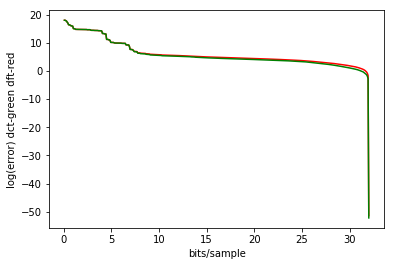

In [29]:
# input sequence generator

#real=np.random.rand(length)
#img=np.random.rand(length)
#x=real+1j*img
x=samples_wav()
N=x.shape[0]
b=32
color=['r',
       'g','b']
for i in range(0,2,1):
    X=general_adv_transform(i,x)
    #print(X)
    err=mse_adv(i,x,X,x.shape[0])
    err=np.log(err)
    print(err.shape)
    a=np.arange(0,x.shape[0],100)
    a=32*(N-a)/N
    plt.plot(a,err,color[i])
    plt.xlabel("bits/sample")
    plt.ylabel("log(error) dct-green dft-red")
    

#y=general_inverse_transform(0,X)
plt.show()
